# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame.


In [2]:
# Ensure the ucimlrepo library is installed. Run this in your VS Code terminal if needed:
# pip install ucimlrepo

#%pip install scikit-learn

from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Metadata
print("Metadata:")
print(heart_disease.metadata)

# Variable information
print("\nVariable Information:")
print(heart_disease.variables)

# Display the first 5 rows of X to verify data loading
print("\nFirst 5 rows of features (X):")
print(X.head())

# Display the first 5 rows of y (target variable)
print("\nFirst 5 rows of target (y):")
print(y.head())

# Display the overall shapes of the dataframes
print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Ste

# 2. Handle missing values (imputation or removal).


In [3]:
# Check for missing values in X (features)
print("\nMissing values in features (X):")
print(X.isnull().sum())

# Check for missing values in y (target) - though usually target is clean
print("\nMissing values in target (y):")
print(y.isnull().sum())

# Get the total count of missing values in X
total_missing_X = X.isnull().sum().sum()
print(f"\nTotal missing values in X: {total_missing_X}")

# Get the percentage of missing values per column in X
print("\nPercentage of missing values per column in X:")
print((X.isnull().sum() / len(X)) * 100)

# Identify columns with missing values (if any)
cols_with_missing = X.columns[X.isnull().any()].tolist()
print(f"\nColumns with missing values: {cols_with_missing}")


Missing values in features (X):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in target (y):
num    0
dtype: int64

Total missing values in X: 6

Percentage of missing values per column in X:
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
dtype: float64

Columns with missing values: ['ca', 'thal']


In [6]:
# 2.1 Strategy for Missing Values: Removal of rows with missing values

# Before removal: Check the current shape of X
print(f"Shape of X before handling missing values: {X.shape}")
# Before removal: Check for total missing values
print(f"Total missing values in X before removal: {X.isnull().sum().sum()}")


# Combine X and y temporarily to ensure consistent row removal
# This is crucial: if a row in X has missing values, its corresponding target in y must also be removed
# Otherwise, X and y will not align, causing errors in modeling
df_combined = pd.concat([X, y], axis=1)

# Drop rows with any missing values from the combined DataFrame
df_cleaned = df_combined.dropna()

# Separate X and y again from the cleaned DataFrame
X = df_cleaned.drop(columns=y.columns) # Remove target columns to get features
y = df_cleaned[y.columns]             # Get only target columns

# After removal: Check the new shape of X and y
print(f"Shape of X after handling missing values: {X.shape}")
print(f"Shape of y after handling missing values: {y.shape}")

# Verify no more missing values
print("\nMissing values in X after removal:")
print(X.isnull().sum().sum())

print("\nMissing values in y after removal:")
print(y.isnull().sum().sum())

Shape of X before handling missing values: (303, 13)
Total missing values in X before removal: 6
Shape of X after handling missing values: (297, 13)
Shape of y after handling missing values: (297, 1)

Missing values in X after removal:
0

Missing values in y after removal:
0


# 3. Perform data encoding (one-hot encoding for categorical variables).

In [4]:
# Identify categorical columns for one-hot encoding
# Based on the variable information (heart_disease.variables),
# 'cp', 'restecg', 'fbs', 'exang', 'slope', 'ca', 'thal', 'sex' are often treated as categorical
# even if numerically represented. Let's confirm based on common Heart Disease UCI dataset interpretation.

# A good approach is to list them explicitly or check their unique values if few.
# For this dataset, typical categorical features include:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Let's check unique values and dtypes of these columns to confirm they are suitable for one-hot encoding.
print("\nUnique values and data types of potential categorical columns:")
for col in categorical_cols:
    if col in X.columns: # Ensure the column exists in our current X
        print(f"\nColumn '{col}':")
        print(f"  Unique values: {X[col].unique()}")
        print(f"  Data type: {X[col].dtype}")
    else:
        print(f"Warning: Column '{col}' not found in X.")


# Perform One-Hot Encoding
# drop_first=True is used to avoid multicollinearity (dummy variable trap)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first 5 rows of the encoded features and the new shape
print("\nFirst 5 rows of features (X) after One-Hot Encoding:")
print(X_encoded.head())
print(f"\nShape of X after One-Hot Encoding: {X_encoded.shape}")

# Store the list of new column names after encoding for future reference
encoded_feature_names = X_encoded.columns.tolist()


Unique values and data types of potential categorical columns:

Column 'sex':
  Unique values: [1 0]
  Data type: int64

Column 'cp':
  Unique values: [1 4 3 2]
  Data type: int64

Column 'fbs':
  Unique values: [1 0]
  Data type: int64

Column 'restecg':
  Unique values: [2 0 1]
  Data type: int64

Column 'exang':
  Unique values: [0 1]
  Data type: int64

Column 'slope':
  Unique values: [3 2 1]
  Data type: int64

Column 'ca':
  Unique values: [ 0.  3.  2.  1. nan]
  Data type: float64

Column 'thal':
  Unique values: [ 6.  3.  7. nan]
  Data type: float64

First 5 rows of features (X) after One-Hot Encoding:
   age  trestbps  chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1  \
0   63       145   233      150      2.3      1     0     0     0      1   
1   67       160   286      108      1.5      1     0     0     1      0   
2   67       120   229      129      2.6      1     0     0     1      0   
3   37       130   250      187      3.5      1     0     1     0      0   

# 4. Standardize numerical features using MinMaxScaler or StandardScaler.


In [5]:
from sklearn.preprocessing import StandardScaler # Added this line!

# Identify numerical columns for standardization
# These are the columns that were NOT included in the categorical_cols list
# and were not created by one-hot encoding.
numerical_cols = X_encoded.select_dtypes(include=np.number).columns.tolist()

# Remove the columns that were originally categorical and got one-hot encoded
# by comparing with the original X.columns
original_categorical_cols_in_X = [col for col in categorical_cols if col in heart_disease.data.features.columns] # Use original feature names before cleaning

# Filter out the one-hot encoded categorical columns from numerical_cols list
# The numerical_cols identified by select_dtypes above will include all the new one-hot encoded columns.
# We need to only standardize the *originally* numerical columns.
# Let's reconstruct the list of truly numerical columns from X_encoded:
# Start with all columns from X_encoded
true_numerical_cols = []
for col in X_encoded.columns:
    # If a column was not part of the original categorical columns that were transformed
    # and it's not one of the new encoded columns (e.g. 'sex_1', 'cp_2', etc.)
    # A simpler way: Get original numerical columns from X before encoding
    if col in heart_disease.data.features.columns and col not in original_categorical_cols_in_X:
        true_numerical_cols.append(col)

print(f"\nOriginal Numerical columns to be scaled: {true_numerical_cols}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only to the identified numerical columns
# Make a copy to avoid SettingWithCopyWarning
X_scaled_numerical = X_encoded[true_numerical_cols].copy()
X_scaled_numerical = scaler.fit_transform(X_scaled_numerical)

# Convert the scaled numerical features back to a DataFrame
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=true_numerical_cols, index=X_encoded.index)

# Combine the scaled numerical features with the one-hot encoded categorical features
# Drop the original numerical columns from X_encoded before concatenating
X_final = pd.concat([X_scaled_numerical_df, X_encoded.drop(columns=true_numerical_cols)], axis=1)

# Display the first 5 rows of the final processed features and the new shape

print("\nFirst 5 rows of features (X) after Standardization:")
print(X_final.head())
print(f"\nShape of X after Standardization: {X_final.shape}")

# Verify that the categorical columns are still present and binary
print("\nUnique values of some encoded categorical columns after standardization check:")
print(X_final['sex_1'].unique())
print(X_final['cp_2'].unique())


Original Numerical columns to be scaled: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

First 5 rows of features (X) after Standardization:
        age  trestbps      chol   thalach   oldpeak  sex_1  cp_2  cp_3  cp_4  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338      1     0     0     0   
1  1.392002  1.611220  0.760415 -1.821905  0.397182      1     0     0     1   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147      1     0     0     1   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573      1     0     1     0   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912      0     1     0     0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  ca_2.0  \
0      1          0          1        0        0        1       0       0   
1      0          0          1        1        1        0       0       0   
2      0          0          1        1        1        0       0       1   
3      0          0          0        0        0        1       0 

# 5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.


Generating Histograms for Numerical Features...


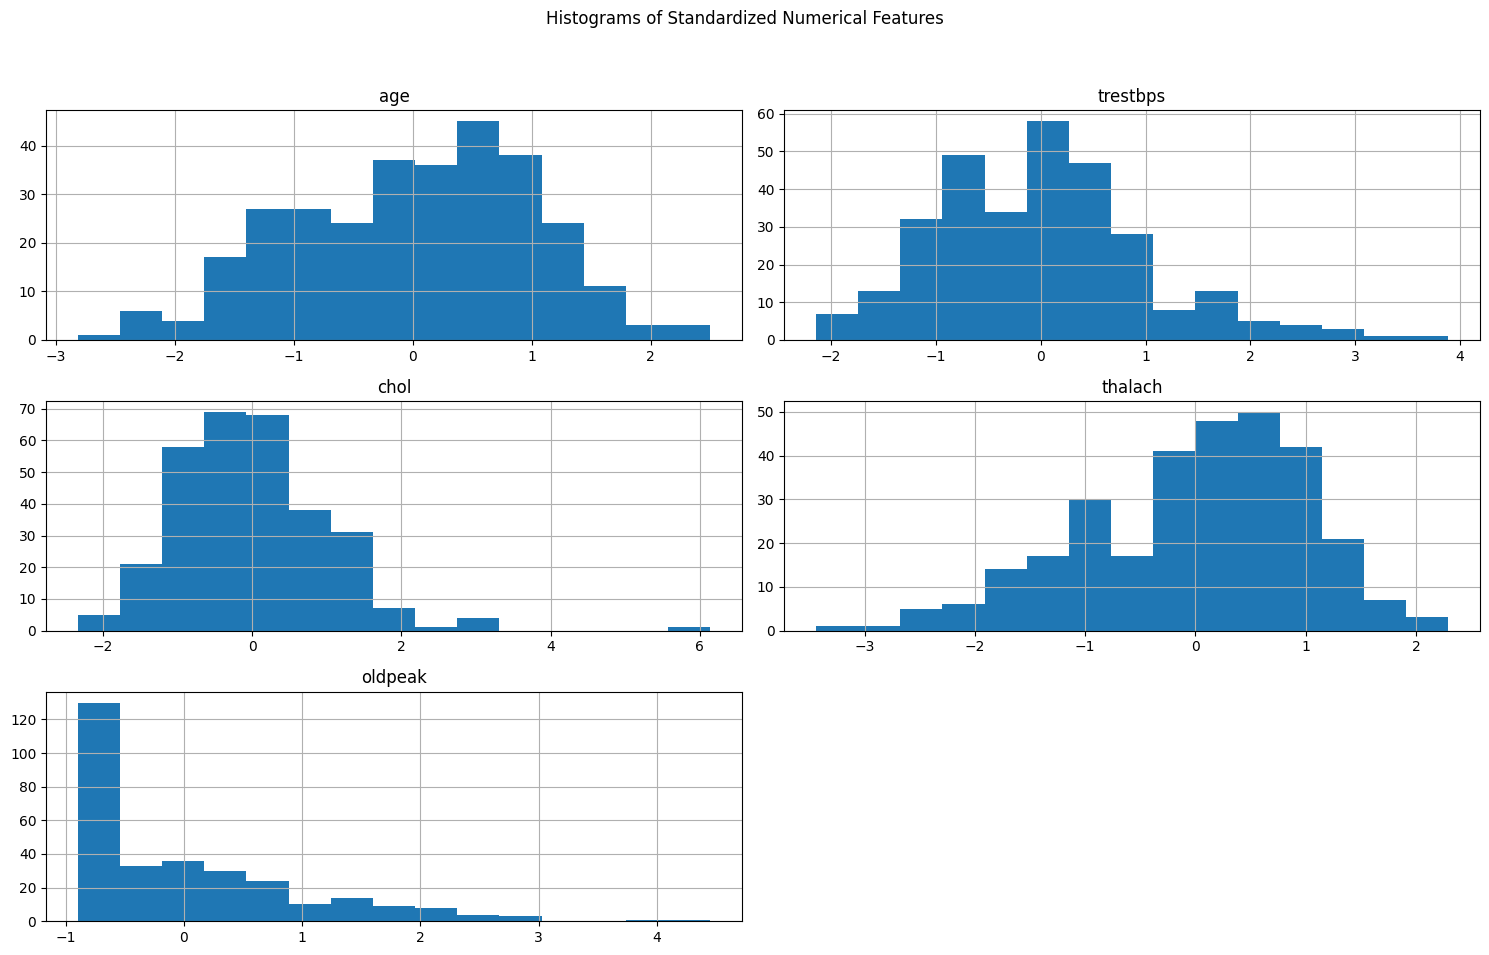


Generating Correlation Heatmap...


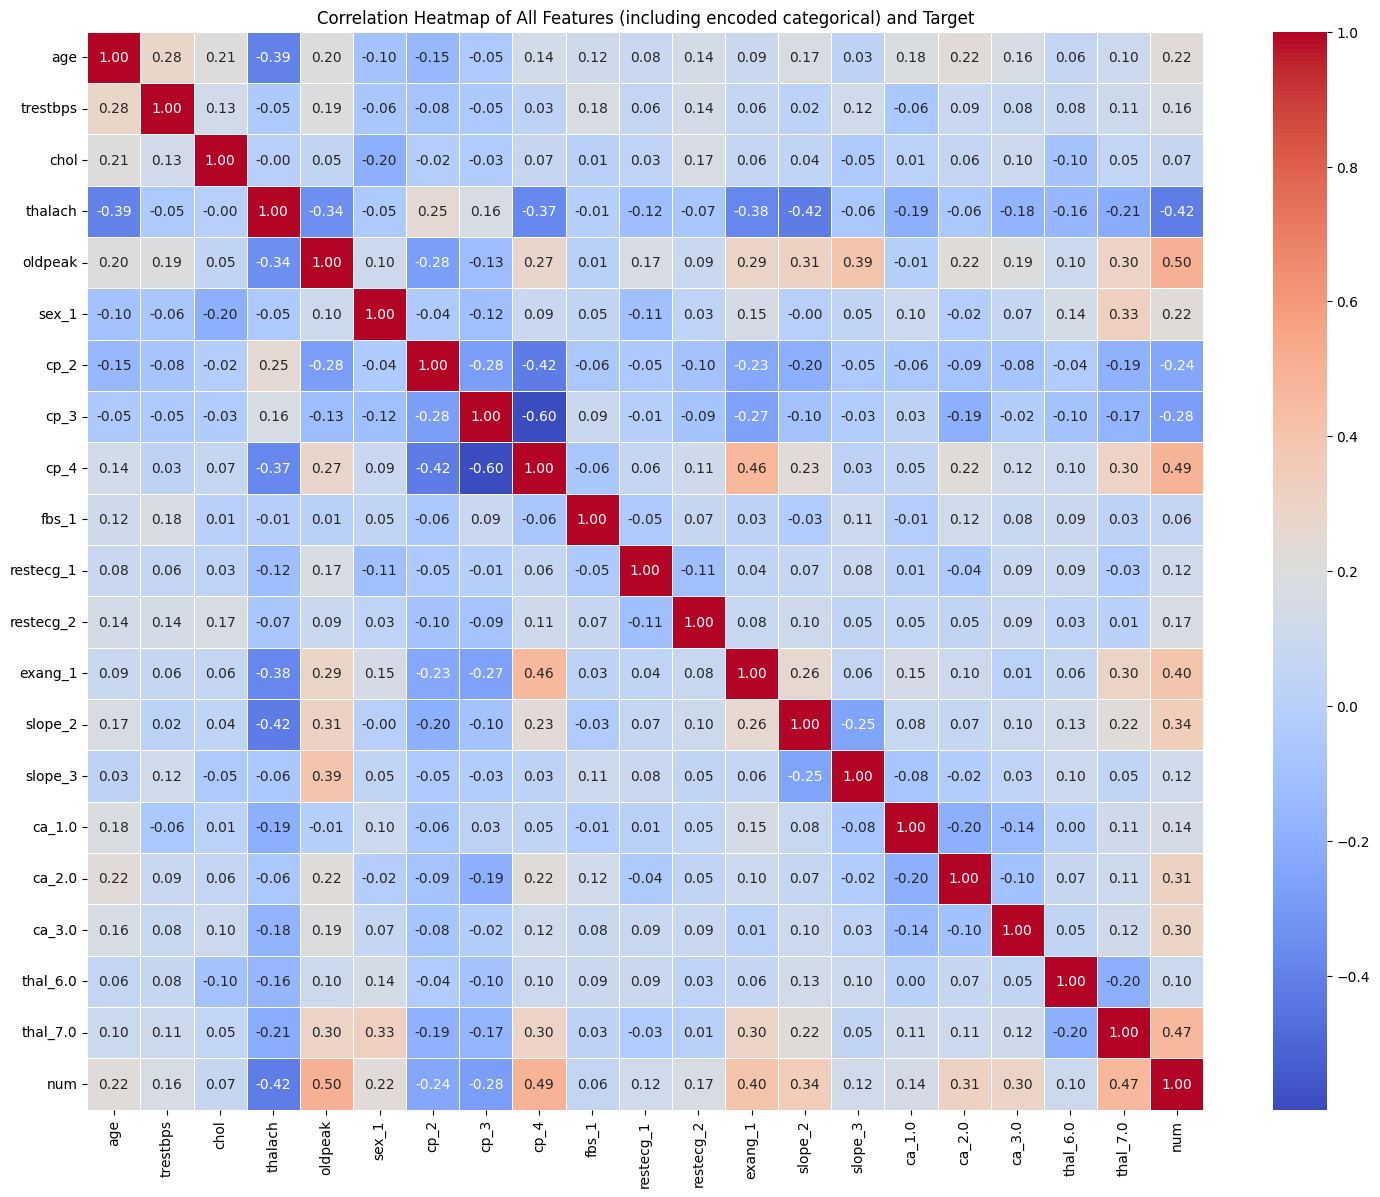


Generating Boxplots for Standardized Numerical Features by Target Class...


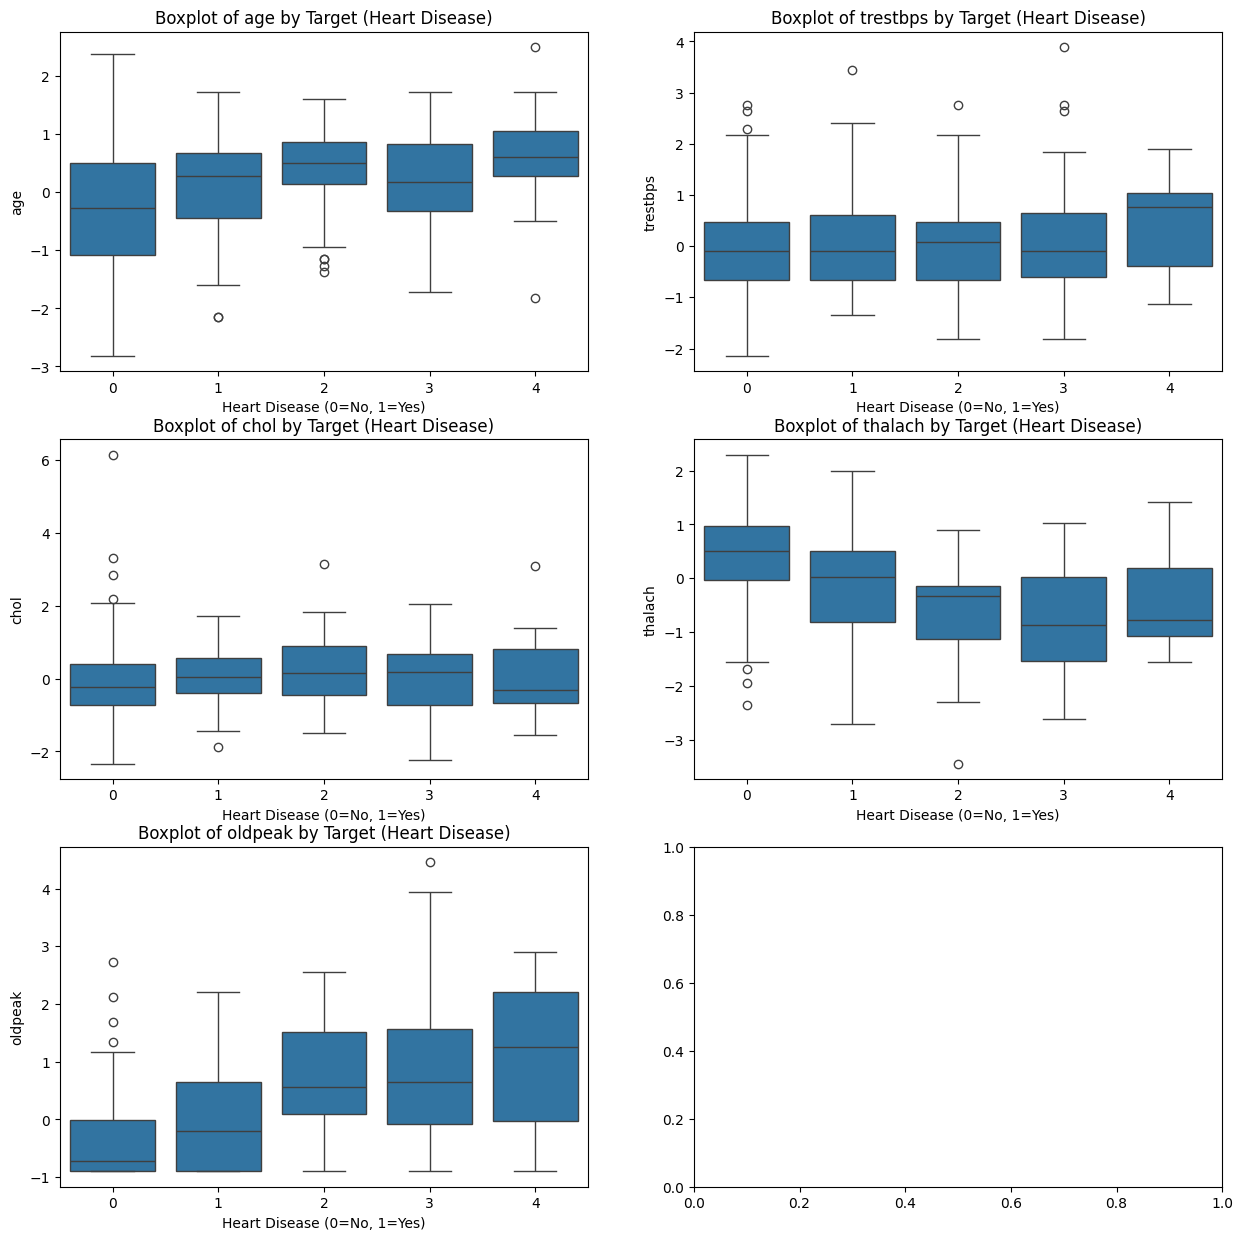

In [6]:
# %pip install matplotlib
# %pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_final and y are combined for easier plotting if needed
# For most plots, we can use X_final directly or combine with y for specific analysis (e.g., target distribution)
df_eda = pd.concat([X_final, y], axis=1)

# --- 5.1 Histograms for numerical features ---
print("\nGenerating Histograms for Numerical Features...")
X_final[true_numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Standardized Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# --- 5.2 Correlation Heatmap ---
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(18, 14)) # Increased size for better readability with 20 columns
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Features (including encoded categorical) and Target')
plt.show()

# --- 5.3 Boxplots for numerical features (against target) ---
# This helps visualize distribution and outliers, and how numerical features vary by target class
print("\nGenerating Boxplots for Standardized Numerical Features by Target Class...")
# Create a figure with multiple subplots
n_rows = (len(true_numerical_cols) + 1) // 2 # Calculate rows needed for 2 columns
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(true_numerical_cols):
    if i < len(axes): # Ensure we don't go out of bounds if n_rows * 2 is greater than len(true_numerical_cols)
        sns.boxplot(x=y.iloc[:, 0], y=df_eda[col], ax=axes[i]) # Use iloc[:, 0] to get the single target column
        axes[i].set_title(f'Boxplot of {col} by Target (Heart Disease)')
        axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)') # Assuming 0/1 for target
        axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig

In [7]:
# Convert target variable to binary (0: no heart disease, 1: heart disease)
# The original 'num' column has values 0, 1, 2, 3, 4.
# We map all values > 0 to 1, and 0 remains 0.
y_binary = y.apply(lambda x: 1 if x.iloc[0] > 0 else 0, axis=1) # Apply lambda to each row to access scalar value

# Convert y_binary to a DataFrame with a proper column name, e.g., 'target'
y_binary = pd.DataFrame(y_binary, columns=['target'])

print("\nOriginal y head:")
print(y.head())
print("\nUnique values of original y:")
print(y.iloc[:, 0].unique()) # Use iloc[:, 0] to get unique values of the single column

print("\nBinary y head:")
print(y_binary.head())
print("\nUnique values of binary y:")
print(y_binary['target'].unique())

# Now, ensure y in subsequent steps refers to y_binary
y = y_binary


Original y head:
   num
0    0
1    2
2    1
3    0
4    0

Unique values of original y:
[0 2 1 3 4]

Binary y head:
   target
0       0
1       1
2       1
3       0
4       0

Unique values of binary y:
[0 1]


In [8]:
# Save the preprocessed data for the next steps
# Ensure the 'data' directory exists
import os
output_data_path = '../data/' # Relative path to data folder from notebooks folder
os.makedirs(output_data_path, exist_ok=True)

X_final.to_csv(os.path.join(output_data_path, 'X_processed.csv'), index=False)
y.to_csv(os.path.join(output_data_path, 'y_processed.csv'), index=False)

print(f"\nProcessed X saved to: {os.path.join(output_data_path, 'X_processed.csv')}")
print(f"Processed y saved to: {os.path.join(output_data_path, 'y_processed.csv')}")


Processed X saved to: ../data/X_processed.csv
Processed y saved to: ../data/y_processed.csv
